In [ ]:
%%capture
!pip3 install -r requirements.txt

## Arquitecture

# Training and Using a Discriminator

The discriminator was trained on a separate script because it took some time. It was trained like this:


``` python
    full_train_discriminator = Discriminator()
    folders = ["inpainting", "insight","text2img"]
    for name in folders:
        train_df, test_df = get_train_test(real="data/wiki/", fake=f"data/{name}/")
        
        print(f"\nTraining full Discriminator:")
        full_train_discriminator.fit(train_df, val_split=0.2, epochs=2, batch_size=BATCH_SIZE, lr=0.0002)
        
        print(f"\nTraining Discriminator: '{name}'")
        single_train_discriminator = Discriminator()
        single_train_discriminator.fit(train_df, val_split=0.2, epochs=6, batch_size=BATCH_SIZE, lr=0.0002)
        single_train_discriminator.save(f"models/discriminator_{name}.pth")
        
    full_train_discriminator.save(f"models/discriminator_full.pth")
```

Then it was saved. Below we load the trained model and use it to predict the whole test dataframe:


### Individual Discriminators

In [ ]:
from utils import get_train_test, get_classification_report, plot_confusion_matrix
from GAN import Discriminator


folder = "inpainting"
_, test_df = get_train_test(real="data/wiki/", fake=f"data/{folder}/")
discriminator = Discriminator.load(f"models/discriminator_{folder}.pth")
pred_df = discriminator.predict(test_df)
display(get_classification_report(pred_df))
plot_confusion_matrix(pred_df)

In [ ]:
folder = "insight"
_, test_df = get_train_test(real="data/wiki/", fake=f"data/{folder}/")
discriminator = Discriminator.load(f"models/discriminator_{folder}.pth")
pred_df = discriminator.predict(test_df)
display(get_classification_report(pred_df))
plot_confusion_matrix(pred_df)


In [ ]:
folder = "text2img"
_, test_df = get_train_test(real="data/wiki/", fake=f"data/{folder}/")
discriminator = Discriminator.load(f"models/discriminator_{folder}.pth")
pred_df = discriminator.predict(test_df)
display(get_classification_report(pred_df))
plot_confusion_matrix(pred_df)

### Full discriminator

In [ ]:
folders = ["inpainting", "insight", "text2img"]

discriminator = Discriminator.load(f"models/discriminator_full.pth")
for folder in folders:
    _, test_df = get_train_test(real="data/wiki/", fake=f"data/{folder}/")
    pred_df = discriminator.predict(test_df)
    print(f"Results for {folder} folder")
    display(get_classification_report(pred_df))
    plot_confusion_matrix(pred_df)

In [ ]:
from GAN import Discriminator

discriminator = Discriminator.load(f"models/discriminator_full_old.pth")

for i in range(1,6):
    print("Fake")
    discriminator.predict_single(f"test/fake{i}.png")
    print("Real")
    discriminator.predict_single(f"test/real{i}.jpg")
    

### Testing with a random image

In [ ]:
from GAN import Discriminator

discriminator = Discriminator.load(f"models/discriminator_full.pth")

for i in range(1,6):
    print("Fake")
    discriminator.predict_single(f"test/fake{i}.png")
    print("Real")
    discriminator.predict_single(f"test/real{i}.jpg")
    

# Training a GAN to use the Generator after

```python
    path = "data/celeba/"
    all_files = sorted([
        os.path.join(path, fname)
        for fname in os.listdir(path)
        if fname.endswith(".jpg")
    ])
    df = pd.DataFrame({"path": all_files, "label": 1})

    gan = GAN(latent_dim=128)
    
    gan.fit(dataframe=df)

    os.makedirs("models", exist_ok=True)
    gan.save("models/generator.pth")
```

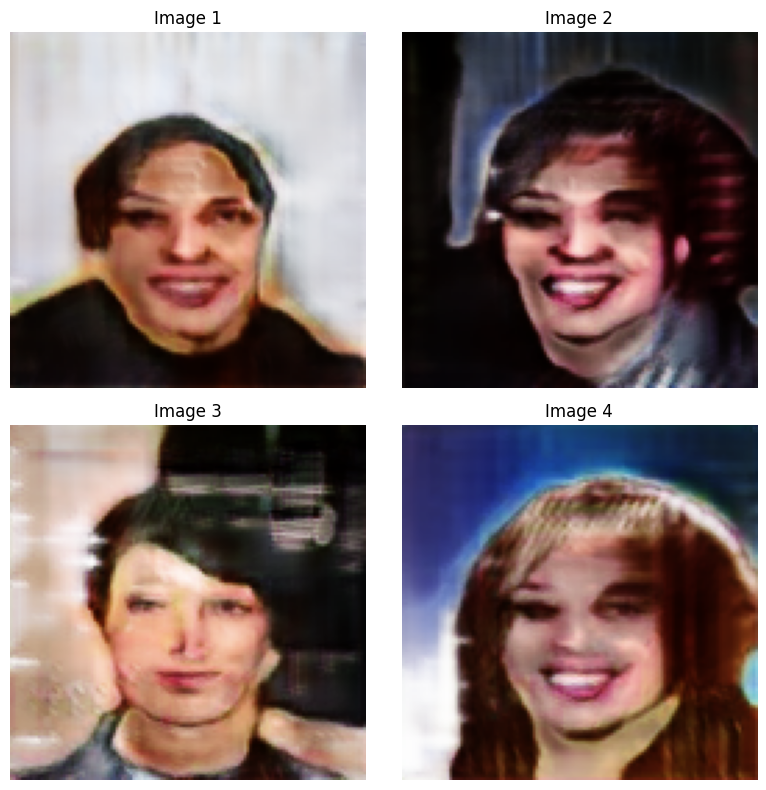

In [ ]:
from GAN import Generator

# Load saved Generator
generator = Generator.load("models/gan/gan_epoch_80/generator.pth")

generator.generate(num_images=4)